# 🫀 EDA of the Heart Disease Dataset

**Author:** Tassawar Abbas \
**Email:** [abbas829@gmail.com](mailto:abbas829@gmail.com)  


In [1]:
# import libraries related to data manipulation, visualization and ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import xgboost as xgb

SEED = 42 # for reproducibility
np.random.seed(SEED)
plt.style.use('fivethirtyeight')

print("✅ Standard ML Environment Ready!")

✅ Standard ML Environment Ready!


In [2]:
# load the dataset to test and train the model
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# examine the first few rows of the training dataset
train.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [4]:
# Check the data types and missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

Data is clean and have no missing values

In [5]:
# count the number of unique values in Heart Disease column
train['Heart Disease'].value_counts()


Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64

## EDA of the tain dataset

In [6]:
# Column Heart Disease is in object format, we need to convert it to numeric
train['Heart Disease'] = train['Heart Disease'].map({'Presence': 1, 'Absence': 0})


In [7]:
train.head()


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,1
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,0
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,0
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,1


In [8]:
# check the types of the columns after conversion
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [9]:
# check the statistics of the dataset
train.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873,0.448340
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007,0.497324
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000,0.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000,1.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [10]:
# Check the shape of the training and testing datasets
print(f"Training dataset shape: {train.shape}")
print(f"Testing dataset shape: {test.shape}")

Training dataset shape: (630000, 15)
Testing dataset shape: (270000, 14)


                               id       Age       Sex  Chest pain type  \
id                       1.000000  0.000975 -0.000784        -0.001332   
Age                      0.000975  1.000000  0.088397         0.109453   
Sex                     -0.000784  0.088397  1.000000         0.195893   
Chest pain type         -0.001332  0.109453  0.195893         1.000000   
BP                      -0.001264 -0.003960 -0.003355        -0.003587   
Cholesterol             -0.001692  0.019485  0.038373         0.045463   
FBS over 120            -0.000647  0.013354  0.020333         0.023036   
EKG results              0.002151  0.057431  0.093590         0.120907   
Max HR                  -0.000089 -0.097542 -0.176186        -0.221806   
Exercise angina          0.000923  0.110153  0.192705         0.246211   
ST depression            0.000973  0.103064  0.181093         0.240228   
Slope of ST             -0.000114  0.096337  0.169854         0.233849   
Number of vessels fluro -0.000273  0.1

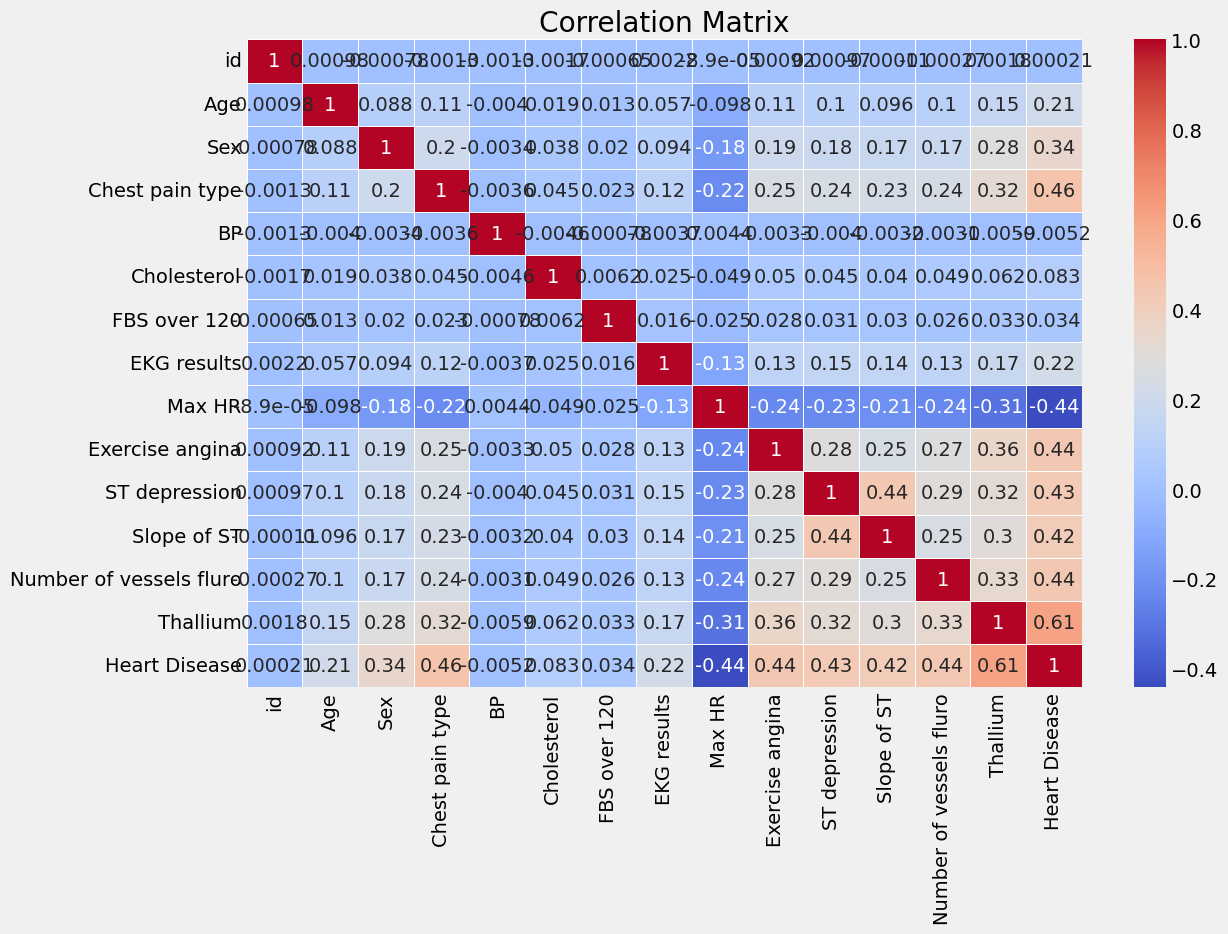

In [13]:
# Find the correlation of the dataset
correlation_matrix = train.corr()
print(correlation_matrix)
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


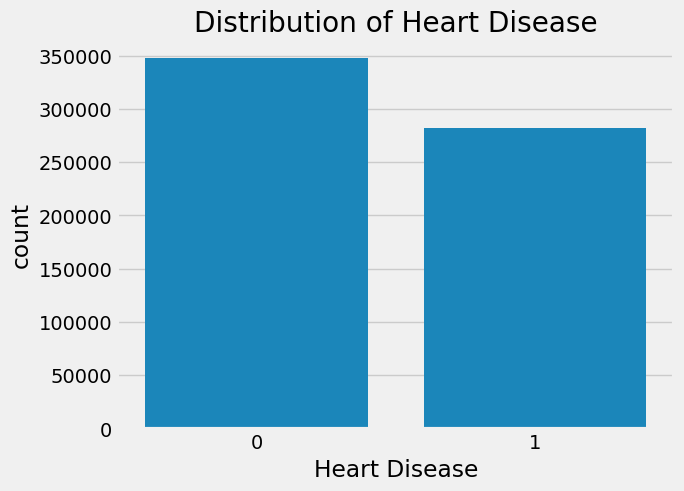

In [14]:
# Check the distribution of the target variable
sns.countplot(x='Heart Disease', data=train)
plt.title('Distribution of Heart Disease')
plt.show()

In [ ]:
# 